In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
fair_df = sm.datasets.fair.load_pandas().data
display(
    fair_df.head(),
    fair_df.tail(),
    fair_df.dtypes,
)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [4]:
fair_df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [5]:
fair_r_df = pd.DataFrame(
    data=np.corrcoef(fair_df.T),
    columns=fair_df.columns,
    index=fair_df.columns
)

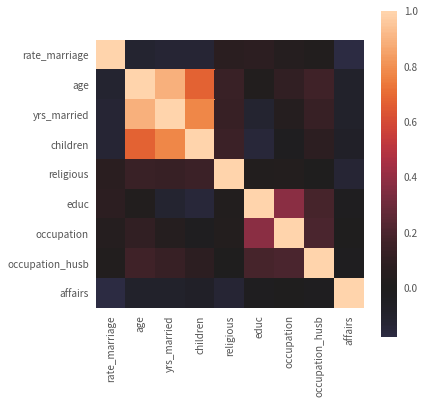

In [6]:
plt.figure(figsize=(6, 6))
sns.heatmap(fair_r_df, center=0, square=True)

In [7]:
ols_res = ols('affairs ~ C(religious)', fair_df).fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     35.75
Date:                Sat, 23 Dec 2017   Prob (F-statistic):           6.66e-23
Time:                        13:04:56   Log-Likelihood:                -14008.
No. Observations:                6366   AIC:                         2.802e+04
Df Residuals:                    6362   BIC:                         2.805e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.2470      0.068     18.231      0.000       1.113       1.381
C(religious)[T.2.0]    -0.4797      0.082     -5.824      0.000      -0.641      -0.318
C(religious)[T.3.0]    -0.7020      0.082     -8.608      0.000      -0.862      -0.542
C(religious)[T.4.0]    -1.0066      0.109     -9.204      0.000      -1.221      -0.792
==============================================================================
Omnibus:                     9285.668   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4607500.498
Skew:                           8.671   Prob(JB):                         0.00
Kurtosis:                     133.651   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall

* **Df**: degree of freedom.
* **Prob (F-statistic)**: $P(\textit{the all coefficients are zeros})$.
* **R-squared**: 0 to 1, 1 indicates a best fit.
* **Adj. R-squared**: 0 to 1, adjusted for the number of explanatory variables.
* **Log-Likelihood**: lower is a better fit.
* **AIC**: Akaike information criterion; lower is a better fit.
* **BIC**: Bayesian information criterion; lower is a better fit.

Terms

* **P>|t|**: $P(\textit{the coefficient is zero})$.

Residuals

* **Durbin-Watson**: the test statistic for detecting autocorrelation.
* **Prob(Omnibus)**: $P(\textit{the residuals are normally distributed by chi-squared test})$.
* **Prob(JB)**: $P(\textit{the residuals are normally distributed by skewness and kurtosis})$.
* **Cond. No.**: condition number.

R-squared

<img style="float: left; width: 50%;" alt="Coefficient_of_Determination.svg" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg">
<p>$
R^{2} = 1 - \dfrac{
    \color{blue}{SS_{\text{res}}}
}{
    \color{red}{SS_{\text{tot}}}
}
$</p>
<p>$
\bar{R}^{2} = 1 - \dfrac{
    \color{blue}{SS_{\text{res}}} / \text{df}_{e}
}{
    \color{red}{SS_{\text{tot}}} / \text{df}_{t}
}
$</p>
<p>See also: https://en.wikipedia.org/wiki/Coefficient_of_determination .</p>

In [8]:
# one-way anova
anova_lm(ols('affairs ~ C(religious)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(religious),512.267983,3.0,35.748251,6.664158e-23
Residual,30388.889563,6362.0,NaN,NaN


group1,group2,meandiff,lower,upper,reject
1.0,2.0,-0.4797,-0.6914,-0.268,True
1.0,3.0,-0.702,-0.9115,-0.4924,True
1.0,4.0,-1.0066,-1.2876,-0.7255,True
2.0,3.0,-0.2222,-0.3864,-0.0581,True
2.0,4.0,-0.5269,-0.7758,-0.2779,True
3.0,4.0,-0.3046,-0.5518,-0.0574,True


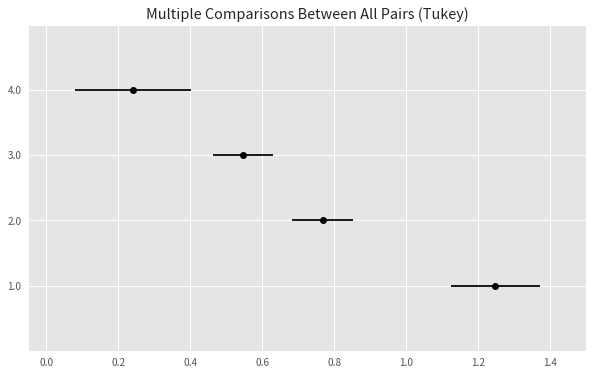

In [9]:
fair_mc = sm.stats.multicomp.MultiComparison(fair_df.affairs, fair_df.religious)
fair_mc_tukeyhsd_res = fair_mc.tukeyhsd()
display(fair_mc_tukeyhsd_res.summary())
_ = fair_mc_tukeyhsd_res.plot_simultaneous()

In [10]:
# two-way anova
anova_lm(ols('affairs ~ C(rate_marriage) * C(religious)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(rate_marriage),1007.541192,4.0,54.817486,1.657790e-45
C(religious),422.134438,3.0,30.622865,1.199806e-19
C(rate_marriage):C(religious),221.600130,12.0,4.018880,3.024540e-06
Residual,29159.748241,6346.0,NaN,NaN


group1,group2,meandiff,lower,upper,reject
1.0,2.0,0.4141,-0.2587,1.0868,False
1.0,3.0,0.1696,-0.4529,0.7921,False
1.0,4.0,-0.5268,-1.1334,0.0797,False
1.0,5.0,-0.8535,-1.4579,-0.2491,True
2.0,3.0,-0.2445,-0.6124,0.1235,False
2.0,4.0,-0.9409,-1.2812,-0.6006,True
2.0,5.0,-1.2676,-1.6041,-0.9311,True
3.0,4.0,-0.6964,-0.9216,-0.4713,True
3.0,5.0,-1.0231,-1.2425,-0.8037,True
4.0,5.0,-0.3267,-0.4956,-0.1577,True


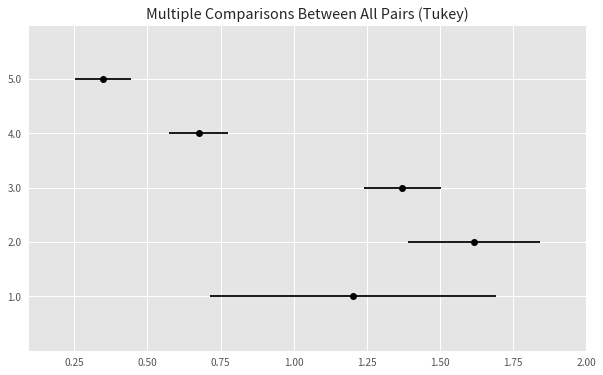

In [11]:
fair_mc = sm.stats.multicomp.MultiComparison(fair_df.affairs, fair_df.rate_marriage)
fair_mc_tukeyhsd_res = fair_mc.tukeyhsd()
display(fair_mc_tukeyhsd_res.summary())
_ = fair_mc_tukeyhsd_res.plot_simultaneous()

## Dig More

* [Linear regression – Wikipedia](https://en.wikipedia.org/wiki/Linear_regression) *[recommended]*
* [anova_lm – StatsModels](http://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm)